In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

def add_functional_group(smiles, group_type):
    molecule = Chem.MolFromSmiles(smiles)

    # Определение функциональной группы для добавления
    if group_type == 'amino':
        functional_group = Chem.MolFromSmiles('N')
    elif group_type == 'hydroxyl':
        functional_group = Chem.MolFromSmiles('O')
    elif group_type == 'phosphino':
        functional_group = Chem.MolFromSmiles('P')
    else:
        return "Неизвестная функциональная группа"

    # Создаем новую молекулу, комбинируя исходную молекулу и выбранную функциональную группу
    combined_molecule = Chem.CombineMols(molecule, functional_group)

    # Находим атомы для установления связи
    carbon_idx = -1
    for atom in molecule.GetAtoms():
        if atom.GetSymbol() == 'C':
            carbon_idx = atom.GetIdx()
            break
    functional_atom_idx = molecule.GetNumAtoms()  # индекс атома функциональной группы в комбинированной молекуле

    # Добавляем связь между углеродом и атомом функциональной группы
    edit_mol = Chem.EditableMol(combined_molecule)
    edit_mol.AddBond(carbon_idx, functional_atom_idx, order=Chem.rdchem.BondType.SINGLE)

    # Получаем окончательную молекулу
    final_molecule = edit_mol.GetMol()

    # Пересчитываем все валентности
    Chem.SanitizeMol(final_molecule)

    # Возвращаем SMILES новой молекулы
    return Chem.MolToSmiles(final_molecule)

# Загрузка датасета
data = pd.read_csv('/content/merged_data.csv')

# Создание списка для хранения результатов
processed_smiles = []

# Обработка каждой строки в датасете
for index, row in data.iterrows():
    #smiles = row['smiles']
    smiles = row.iloc[0]
    try:
        # Добавление функциональных групп к SMILES
        combined_smiles = add_functional_group(smiles, 'amino')
        combined_smiles2 = add_functional_group(smiles, 'hydroxyl')
        combined_smiles3 = add_functional_group(smiles, 'phosphino')
        processed_smiles.append(combined_smiles)
        processed_smiles.append(combined_smiles2)
        processed_smiles.append(combined_smiles3)
    except Exception as e:
        print(f"Ошибка при обработке SMILES: {smiles}, {e}")

# Создание нового DataFrame с обработанными SMILES
processed_data = pd.DataFrame({'processed_smiles': processed_smiles})

# Сохранение результатов в новый файл CSV
processed_data.to_csv('helll.csv', index=False)


[07:57:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is g

Ошибка при обработке SMILES: O=C(O)CN1CCNCCN(CC(=O)O)CCNCC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNOCCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNCCN(CP(=O)(O)O)CCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNCCN(CP(=O)(O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)c1cccc(CN2CCOCCOCCN(c3cccc(C(=O)O)n3)CCOCCOCC2)n1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN(CCOCCOCCN(CC(=O)O)CC(=O)O)CC(=O)O, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CC(CCNCOCN(CC(=O)O)CC(=O)O)CC(=O)O, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CC(CC1CCCCC1NC(C(=O)O)C(=O)O)C(=O)O, Explicit v

[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is g

Ошибка при обработке SMILES: O=C(O)CN1CCNN(CC(=O)O)CCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNCCN(CC(=O)O)CCN(CP(=O)(O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCN(CC(=O)O)CCN(CP(=O)(O)O)CCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN(CCNNCCN(CC(=O)O)CC(=O)O)CC(=O)O, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCN(CC(=O)O)CCN(CP(=O)(O)O)CCNN(CP(=O)(O)O)CCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCNCCN(CC(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)C

[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is greater than permitted
[07:57:13] Explicit valence for atom # 1 C, 5, is g

In [13]:
xex=pd.read_csv('/content/aaaa.csv')

In [14]:
xex

,CC(=O)CN(CC(C)=O)C(CCCCCCN)C(C)=O
0,CC(=O)CN(CC(C)=O)C(CCCCCCO)C(C)=O
1,CC(=O)CN(CC(C)=O)C(CCCCCCP)C(C)=O
2,CC(=O)CC(CCCCCCN)N(CC(C)=O)CC(C)=O
3,CC(=O)CC(CCCCCCO)N(CC(C)=O)CC(C)=O
4,CC(=O)CC(CCCCCCP)N(CC(C)=O)CC(C)=O
...,...
94,O=C(O)CCCCCCCCP
95,NCC=CC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O
96,O=C(O)CN(CC(=O)O)CC(C=CCO)N(CC(=O)O)CC(=O)O
97,O=C(O)CN(CC(=O)O)CC(C=CCP)N(CC(=O)O)CC(=O)O


In [15]:
xex=xex.drop_duplicates()
xex

,CC(=O)CN(CC(C)=O)C(CCCCCCN)C(C)=O
0,CC(=O)CN(CC(C)=O)C(CCCCCCO)C(C)=O
1,CC(=O)CN(CC(C)=O)C(CCCCCCP)C(C)=O
2,CC(=O)CC(CCCCCCN)N(CC(C)=O)CC(C)=O
3,CC(=O)CC(CCCCCCO)N(CC(C)=O)CC(C)=O
4,CC(=O)CC(CCCCCCP)N(CC(C)=O)CC(C)=O
...,...
94,O=C(O)CCCCCCCCP
95,NCC=CC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O
96,O=C(O)CN(CC(=O)O)CC(C=CCO)N(CC(=O)O)CC(=O)O
97,O=C(O)CN(CC(=O)O)CC(C=CCP)N(CC(=O)O)CC(=O)O


In [10]:
xex.to_csv('aaaa.csv', index=False, header=False)

In [12]:
import csv


file_path = '/content/aaaa.csv'

new_row_text = ['O=C(O)CN1CCN(CC(O)=NC2CN(CP(=O)(O)O)CCN2CC(=O)O)CCNN(CC(=O)O)CCN(CP(=O)(O)O)CC1']

# Открываем файл CSV для добавления строки
with open(file_path, 'a', newline='') as file:
    writer = csv.writer(file)

    # Записываем новую строку в файл CSV
    writer.writerow(new_row_text)

print("Новая строка успешно добавлена в файл CSV!")

Новая строка успешно добавлена в файл CSV!


In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors

def modify_molecule(smiles, modification_type='amine'):
    molecule = Chem.MolFromSmiles(smiles)
    modification_options = {
        'amine': 'N',
        'hydroxyl': 'O',
        'phosphine': 'P',
        'thiol': 'S'
    }

    # Добавляем функциональную группу к молекуле
    mod_group = Chem.MolFromSmiles(modification_options[modification_type])

    # Находим подходящий атом для модификации
    # Здесь может быть более сложная логика выбора в зависимости от структуры молекулы
    target_atom_idx = -1
    for atom in molecule.GetAtoms():
        if atom.GetSymbol() == 'C' and atom.GetDegree() < 4:  # Простой пример: ищем углерод с менее чем 4 связями
            target_atom_idx = atom.GetIdx()
            break

    if target_atom_idx == -1:
        print("Не найден подходящий атом для модификации.")
        return None

    # Добавление модификации
    # Для упрощения примера предположим, что мы добавляем модификацию прямо к этому атому
    molecule_with_mod = AllChem.RWMol(molecule)
    mod_atom_idx = molecule_with_mod.AddAtom(Chem.Atom(modification_options[modification_type]))
    molecule_with_mod.AddBond(target_atom_idx, mod_atom_idx, order=Chem.rdchem.BondType.SINGLE)
    try:
      modified_molecule = molecule_with_mod.GetMol()
      Chem.SanitizeMol(modified_molecule)

      return Chem.MolToSmiles(modified_molecule)
    # Завершение модификации
    except Exception as e:
        print(f"Ошибка при обработке SMILES: {smiles}, {e}")


# Пример использования
smiles = "CCC(O)(CC)C(=O)O"  # Пропанол
for mod_type in ['amine', 'hydroxyl', 'phosphine', 'thiol']:
    modified_smiles = modify_molecule(smiles, modification_type=mod_type)
    print(f"Модификация: {mod_type}, SMILES: {modified_smiles}")

Модификация: amine, SMILES: CCC(O)(CCN)C(=O)O
Модификация: hydroxyl, SMILES: CCC(O)(CCO)C(=O)O
Модификация: phosphine, SMILES: CCC(O)(CCP)C(=O)O
Модификация: thiol, SMILES: CCC(O)(CCS)C(=O)O


In [27]:
df=pd.read_csv('/content/suka.csv')

In [30]:
df['msmiles']=df.iloc[:,0].apply(modify_molecule)


Ошибка при обработке SMILES: Nc1nc(O)c([N+](=O)[O-])c(NCCCCc2ccccc2)n1, Can't kekulize mol.  Unkekulized atoms: 2 3 5 9 21
Ошибка при обработке SMILES: Oc1nc2ccccc2n1C1CCN(CC2COc3ccccc3O2)CC1, Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8
Ошибка при обработке SMILES: O=c1c(-c2ccc(O)cc2)c(Oc2ccc(OCCN3CCCCC3)cc2)oc2cc(O)ccc12, Explicit valence for atom # 1 C, 6, is greater than permitted
Ошибка при обработке SMILES: O=C(O)C1CCC(NC(=O)C(Cc2ccccc2)CC(Cc2ccccc2)C(=O)O)CC1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CN1CCCCCCC(NC(CCc2ccccc2)C(=O)O)C1=O, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CC1c2ccccc2C(=O)N(CC(=O)NCCCCCNc2nc3ccccc3[nH]2)c2ccccc21, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=C(O)CNCc1ccc(OCc2cccc(Cl)c2)cc1, Explicit valence for atom # 1 C, 5, is greater than permitted
Ошибка при обработке SMILES: O=c1cc(CCCc

[08:23:22] Can't kekulize mol.  Unkekulized atoms: 2 3 5 9 21
[08:23:22] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8
[08:23:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 6, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Can't kekulize mol.  Unkekulized atoms: 2 3 4 22 23
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:22] Explicit valence for atom # 1 C, 5, is greater than permitted
[08:23:

In [31]:
df

,O=C(O)C(CCCCn1cnc2c1NC=NCC2O)(Cc1ccccc1C(F)(F)F)C(=O)O,msmiles
0,Cc1ccc(-c2cc(CN(Cc3ccccc3)C(CCCN=C(N)N)C(N)=O)...,NCc1ccc(-c2cc(CN(Cc3ccccc3)C(CCCN=C(N)N)C(N)=O...
1,Cc1cc(N)cc(C)c1C(=O)NCCN1CCN(c2ccccn2)CC1,Cc1cc(N)cc(CN)c1C(=O)NCCN1CCN(c2ccccn2)CC1
2,COCc1noc(O)c1Cc1ccc2ccccc2c1,NCOCc1noc(O)c1Cc1ccc2ccccc2c1
3,Cc1ccc2c(c1)c(=O)nc(C(C)C)n2-c1ccccc1,CC(C)c1nc(=O)c2cc(CN)ccc2n1-c1ccccc1
4,Nc1nc(O)c([N+](=O)[O-])c(NCCCCc2ccccc2)n1,None
...,...,...
94,CCCCCn1c(CCl)nc2c(OC)c3c(=O)n(CCCOC)c(CCl)nc3c...,COCCCn1c(CCl)nc2c(OC)c3c(=O)n(CCCCCN)c(CCl)nc3...
95,Cc1cnc(F)cc1-c1cc(C)c2nc(Nc3ccc(OCCN4CCCC4)cc3...,Cc1cc(-c2cc(F)ncc2CN)cc2nnc(Nc3ccc(OCCN4CCCC4)...
96,CCCCCCCCOc1ccc(C=CC(=O)OCCCl)cc1,NCCCCCCCCOc1ccc(C=CC(=O)OCCCl)cc1
97,CC(C)(C)c1ccc(-c2nc3ccccc3o2)cc1,CC(C)(CN)c1ccc(-c2nc3ccccc3o2)cc1


In [32]:
df=df.dropna()

In [33]:
df

,O=C(O)C(CCCCn1cnc2c1NC=NCC2O)(Cc1ccccc1C(F)(F)F)C(=O)O,msmiles
0,Cc1ccc(-c2cc(CN(Cc3ccccc3)C(CCCN=C(N)N)C(N)=O)...,NCc1ccc(-c2cc(CN(Cc3ccccc3)C(CCCN=C(N)N)C(N)=O...
1,Cc1cc(N)cc(C)c1C(=O)NCCN1CCN(c2ccccn2)CC1,Cc1cc(N)cc(CN)c1C(=O)NCCN1CCN(c2ccccn2)CC1
2,COCc1noc(O)c1Cc1ccc2ccccc2c1,NCOCc1noc(O)c1Cc1ccc2ccccc2c1
3,Cc1ccc2c(c1)c(=O)nc(C(C)C)n2-c1ccccc1,CC(C)c1nc(=O)c2cc(CN)ccc2n1-c1ccccc1
5,CCc1nc2c(C)ccnc2n1C1CCc2cc(-c3ccccc3-c3nn[nH]n...,Cc1ccnc2c1nc(CCN)n2C1CCc2cc(-c3ccccc3-c3nn[nH]...
...,...,...
94,CCCCCn1c(CCl)nc2c(OC)c3c(=O)n(CCCOC)c(CCl)nc3c...,COCCCn1c(CCl)nc2c(OC)c3c(=O)n(CCCCCN)c(CCl)nc3...
95,Cc1cnc(F)cc1-c1cc(C)c2nc(Nc3ccc(OCCN4CCCC4)cc3...,Cc1cc(-c2cc(F)ncc2CN)cc2nnc(Nc3ccc(OCCN4CCCC4)...
96,CCCCCCCCOc1ccc(C=CC(=O)OCCCl)cc1,NCCCCCCCCOc1ccc(C=CC(=O)OCCCl)cc1
97,CC(C)(C)c1ccc(-c2nc3ccccc3o2)cc1,CC(C)(CN)c1ccc(-c2nc3ccccc3o2)cc1


In [ ]:
df=df.drop()

In [2]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.1 MB/s eta 0:00:00


In [1]:
import csv
import os

# Папка, содержащая ваши CSV файлы
folder_path = '/content/sample_data'

# Список файлов CSV в папке
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Путь к файлу CSV, куда вы хотите записать объединенные данные
merged_file_path = 'merged_data.csv'

# Открываем новый файл CSV для записи
with open(merged_file_path, 'w', newline='') as merged_file:
    writer = csv.writer(merged_file)

    # Проходим по каждому файлу CSV
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)

        # Открываем текущий файл CSV для чтения
        with open(file_path, 'r') as file:
            reader = csv.reader(file)

            # Читаем каждую строку из текущего файла и записываем ее в новый файл CSV
            for row in reader:
                writer.writerow(row)

print("Данные успешно объединены в один столбец в файле 'merged_data.csv'!")

Данные успешно объединены в один столбец в файле 'merged_data.csv'!


In [34]:
data = pd.read_csv('/content/analsys.csv')

In [35]:
#hoh и тд

In [36]:
data

,id,smiles,lgK
0,0,CC(C)(O)C(=O)O,3.41
1,1,CCC(O)(CC)C(=O)O,3.25
2,2,O=C(O)C1(O)CCCC1,3.22
3,3,O=C(O)C1(O)CCCCC1,2.78
4,4,O=C(O)C(O)c1ccccc1,2.82
...,...,...,...
242,244,O=C(O)c1cccc([N+](=O)[O-])c1,1.64
243,245,CCC(O)C(=O)O,3.13
244,246,CCCC(O)C(=O)O,2.76
245,247,CC(C)C(O)C(=O)O,2.99


In [37]:
import pandas as pd
from rdkit import Chem


# Extract the SMILES column from the dataframe
smiles_column = data['smiles']

# Initialize a list to store parsed molecules
molecules = []

# Parse the first 20 molecules
for smiles in smiles_column[:20]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecules.append(mol)

# Display the SMILES for the first 20 molecules
for i, mol in enumerate(molecules):
    print(f"Molecule {i+1} SMILES: {Chem.MolToSmiles(mol)}")

Molecule 1 SMILES: CC(C)(O)C(=O)O
Molecule 2 SMILES: CCC(O)(CC)C(=O)O
Molecule 3 SMILES: O=C(O)C1(O)CCCC1
Molecule 4 SMILES: O=C(O)C1(O)CCCCC1
Molecule 5 SMILES: O=C(O)C(O)c1ccccc1
Molecule 6 SMILES: CC(O)C(C)(O)C(=O)O
Molecule 7 SMILES: O=C(O)C(O)(CO)CO
Molecule 8 SMILES: O=C(O)[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO
Molecule 9 SMILES: O=C([O-])C1(O)C[C@@H](O)C(O)[C@H](O)C1
Molecule 10 SMILES: O=C(O)CCO
Molecule 11 SMILES: CC(CO)(CO)C(=O)O
Molecule 12 SMILES: COc1ccccc1C(=O)O
Molecule 13 SMILES: COc1cccc(C(=O)O)c1
Molecule 14 SMILES: COc1ccc(C(=O)O)cc1
Molecule 15 SMILES: O=C(O)CC(=O)O
Molecule 16 SMILES: CC(C(=O)O)C(=O)O
Molecule 17 SMILES: CCC(C(=O)O)C(=O)O
Molecule 18 SMILES: CCCC(C(=O)O)C(=O)O
Molecule 19 SMILES: CCCCC(C(=O)O)C(=O)O
Molecule 20 SMILES: CCCCCC(C(=O)O)C(=O)O


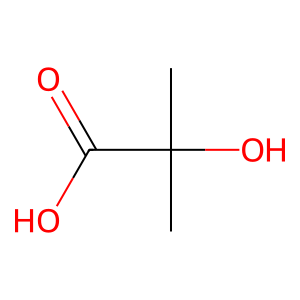

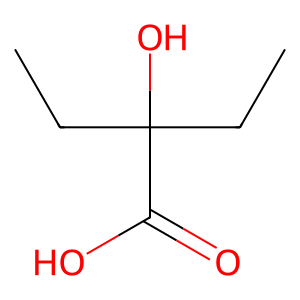

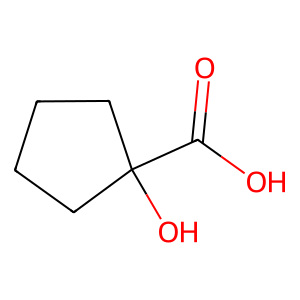

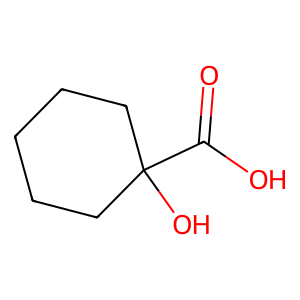

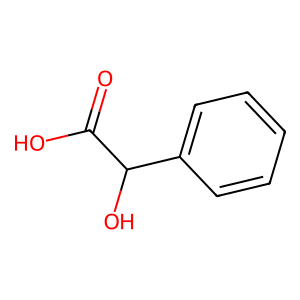

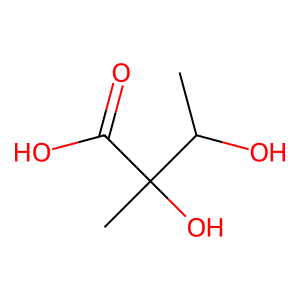

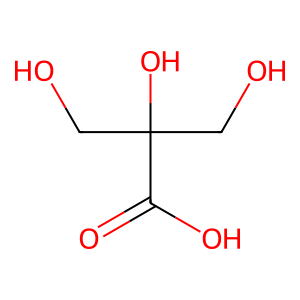

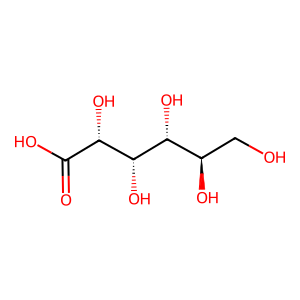

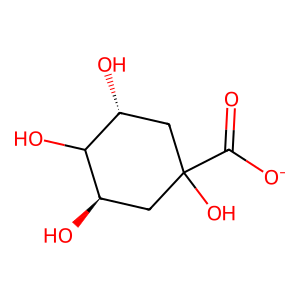

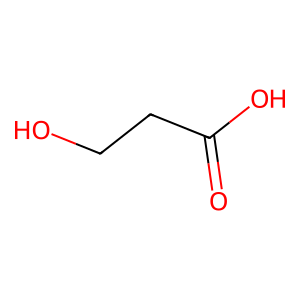

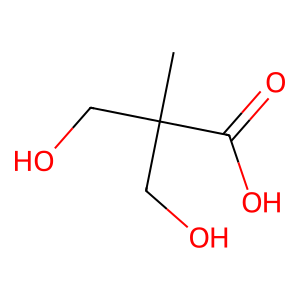

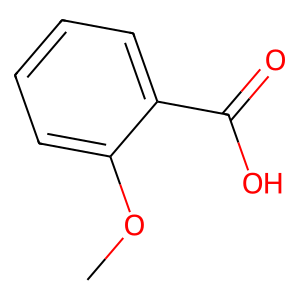

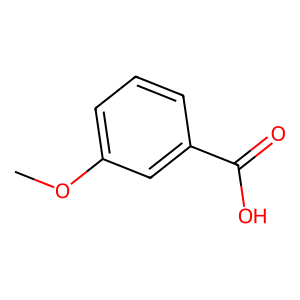

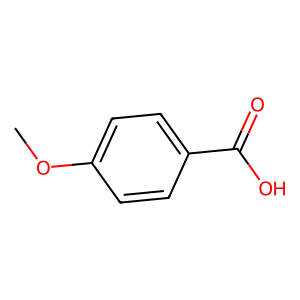

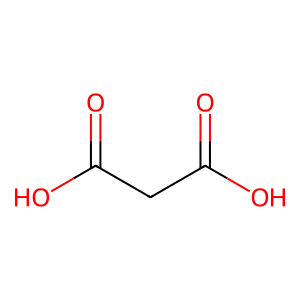

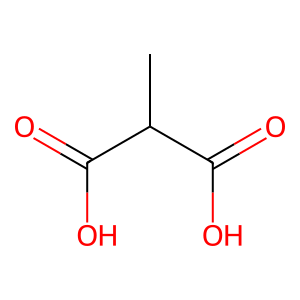

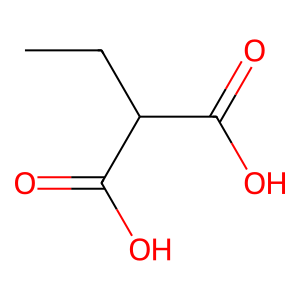

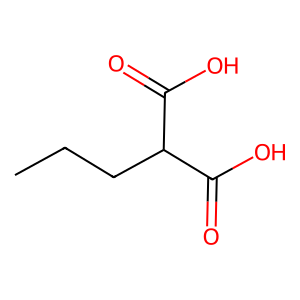

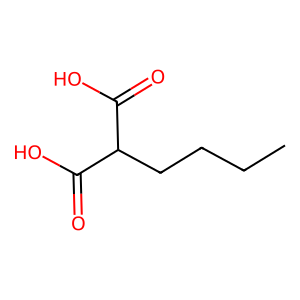

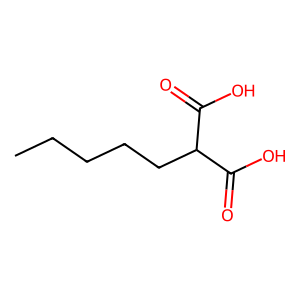

In [38]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

# Read the dataset
#data = pd.read_csv('/content/analsys.csv')

# Extract the SMILES column from the dataframe
smiles_column = data['smiles']

# Initialize a list to store parsed molecules
molecules = []

# Parse the first 20 molecules
for smiles in smiles_column[:20]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecules.append(mol)

# Generate images for the molecules
images = [Draw.MolToImage(mol, size=(300, 300)) for mol in molecules]

# Display the images
for i, img in enumerate(images):
    display(img)#

In [39]:
import pandas as pd
from rdkit import Chem

# Read the dataset
data = pd.read_csv('/content/analsys.csv')

# Initialize a list to store the differences
differences = []

# Iterate through each pair of molecules
for i in range(len(data)):
    for j in range(i+1, len(data)):
        mol1 = Chem.MolFromSmiles(data.at[i, 'smiles'])
        mol2 = Chem.MolFromSmiles(data.at[j, 'smiles'])
        lgk1 = data.at[i, 'lgK']
        lgk2 = data.at[j, 'lgK']

        # Check if mol2 is a substructure of mol1
        if mol1.HasSubstructMatch(mol2):
            # Subtract lgk2 from lgk1
            diff = lgk1 - lgk2
            differences.append({'Molecule1': data.at[i, 'smiles'], 'Molecule2': data.at[j, 'smiles'], 'Difference': diff})

# Convert list of differences to DataFrame
differences_df = pd.DataFrame(differences)

# Save differences to a new file
differences_df.to_csv('/content/differences.csv', index=False)

In [47]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Read the dataset
data = pd.read_csv('/content/analsys.csv')

# Initialize a list to store the differences
differences = []

# Iterate through each pair of molecules
for i in range(len(data)):
    for j in range(i+1, len(data)):
        mol1 = Chem.MolFromSmiles(data.at[i, 'smiles'])
        mol2 = Chem.MolFromSmiles(data.at[j, 'smiles'])
        lgk1 = data.at[i, 'lgK']
        lgk2 = data.at[j, 'lgK']

        # Check if mol2 is a substructure of mol1
        if mol1.HasSubstructMatch(mol2):
            # Subtract lgk2 from lgk1
            diff_lgk = lgk1 - lgk2

            # Get structural difference
            substruct_atoms = mol1.GetSubstructMatch(mol2)
            mol_diff = AllChem.DeleteSubstructs(mol1, mol2)
            smiles_diff = Chem.MolToSmiles(mol_diff)

            differences.append({'Molecule1': data.at[i, 'smiles'], 'Molecule2': data.at[j, 'smiles'],
                                'Structural Difference': smiles_diff, 'lgk Difference': diff_lgk})

# Convert list of differences to DataFrame
differences_df = pd.DataFrame(differences)

# Save differences to a new file
differences_df.to_csv('/content/differences_with_structure.csv', index=False)

In [79]:
xm=pd.read_csv('/content/differences_with_structure.csv')

xm

,Molecule1,Molecule2,Structural Difference,lgk Difference
0,CC(C)(O)C(=O)O,C[C@H](O)C(=O)O,NaN,0.01
1,CC(C)(O)C(=O)O,O=CO,CC(C)O,2.42
2,CC(C)(O)C(=O)O,CC(=O)O,C.C.O,1.56
3,CCC(O)(CC)C(=O)O,CCC(C)(O)C(=O)O,NaN,-0.20
4,CCC(O)(CC)C(=O)O,C[C@H](O)C(=O)O,C.C,-0.15
...,...,...,...,...
603,O=C(O)c1ccccn1,CC(=O)O,ccccn,2.56
604,O=C(O)CN(CC(=O)O)Cc1ccccn1,O=CO,CN(C)Cc1ccccn1,8.73
605,O=C(O)CN(CC(=O)O)Cc1ccccn1,CC(=O)O,NCc1ccccn1,7.87
606,Cc1cccc(CN(CC(=O)O)CC(=O)O)n1,O=CO,Cc1cccc(CN(C)C)n1,6.61


In [80]:
xm=xm.sort_values(by='lgk Difference', ignore_index=True, ascending=False)

In [81]:
xm

,Molecule1,Molecule2,Structural Difference,lgk Difference
0,O=C(O)N1CCN(CP(=O)(O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,O=CO,O=P(O)(O)CN1CCNCCNCCNCC1,27.61
1,O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C...,O=CO,CCP(=O)(O)CN1CCNCCNCCNCC1,24.51
2,O=C(O)CCP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C...,CC(=O)O,CP(=O)(O)CN1CCN(C(=O)O)CCN(C(=O)O)CCN(C(=O)O)CC1,23.65
3,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)C...,O=CO,CN1CCN(C)CCN(C)CCN(C)CCN(C)CCN(C)CC1,23.27
4,Nc1ccc(CP(=O)(O)CN2CCN(C(=O)O)CCN(C(=O)O)CCN(C...,O=CO,Nc1ccc(CP(=O)(O)CN2CCNCCNCCNCC2)cc1,23.01
...,...,...,...,...
603,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOC(=O)C1,O=C(O)CN(CCO)CCN(CC(=O)O)CC(=O)O,CC,-9.13
604,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCOCOCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCOCOC,-10.81
605,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOCCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCCOCC,-11.17
606,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCC,-12.03


In [82]:
filtered_df = xm.loc[xm['lgk Difference'] <= 13]

filtered_df

,Molecule1,Molecule2,Structural Difference,lgk Difference
104,O=C(O)CN(CCN(CCN(CC(=O)O)CC(=O)O)c1ccccc1)CC(=O)O,CC(=O)O,NCCN(CCN)c1ccccc1,12.89
105,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)C...,NCC(=O)O,CC.CC.CC.CC.CC,12.81
106,O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O,NCC(=O)O,C,12.70
107,O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O,CC(=O)O,NCCN,12.47
108,O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O)O)CC...,O=C(O)CNCCNCC(=O)O,CCCC,12.42
...,...,...,...,...
603,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOC(=O)C1,O=C(O)CN(CCO)CCN(CC(=O)O)CC(=O)O,CC,-9.13
604,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCOCOCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCOCOC,-10.81
605,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOCCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCCOCC,-11.17
606,O=C(O)CN1CCN(CC(=O)O)CC(=O)OCCOCCOC(=O)C1,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,CCOCC,-12.03


In [83]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Read the dataset
data = pd.read_csv('/content/analsys.csv')

# Read differences with structural difference and lgk difference
differences_df = filtered_df

# Filter differences where lgk difference > 2
valid_differences = differences_df[differences_df['lgk Difference'] > 2]

# Initialize a list to store valid molecules with updated lgk values
valid_molecules = []

# Iterate through valid differences
for _, row in valid_differences.iterrows():
    mol1 = Chem.MolFromSmiles(row['Molecule1'])

    # Handle missing values in the 'Structural Difference' column
    if pd.notnull(row['Structural Difference']):
        mol_diff = Chem.MolFromSmiles(row['Structural Difference'])
    else:
        mol_diff = None

    lgk_diff = row['lgk Difference']

    # Create a new molecule by combining mol1 with mol_diff if mol_diff is not None
    if mol_diff is not None:
        new_mol = Chem.CombineMols(mol1, mol_diff)

        # Update lgk value for the new molecule
        lgk_new = data.loc[data['smiles'] == row['Molecule1'], 'lgK'] + lgk_diff

        valid_molecules.append({'Molecule': Chem.MolToSmiles(new_mol), 'lgk-new': lgk_new})

# Convert list of valid molecules to DataFrame
valid_molecules_df = pd.DataFrame(valid_molecules)

# Save valid molecules with updated lgk values to a new file
valid_molecules_df.to_csv('/content/valid_molecules_with_updated_lgk.csv', index=False)

[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 5 marked aromatic
[10:14:23] non-ring atom 5 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic
[10:14:23] non-ring atom 0 marked aromatic


In [84]:
data=pd.read_csv('/content/valid_molecules_with_updated_lgk.csv')

In [85]:
data

,Molecule,lgk-new
0,NCCN(CCN)c1ccccc1.O=C(O)CN(CCN(CCN(CC(=O)O)CC(...,"224 27.63\nName: lgK, dtype: float64"
1,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)...,"72 29.52\nName: lgK, dtype: float64"
2,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O,"80 29.3\nName: lgK, dtype: float64"
3,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O,"201 26.79\nName: lgK, dtype: float64"
4,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...,"129 33.93\nName: lgK, dtype: float64"
...,...,...
270,CCOCCOCCNCCOCCOCC.O=C(O)CN1CCOCCOCCNCCOCCOCC1,69 8.12\n114 8.12\n163 8.12\nName: l...
271,CCCC.O=C(O)CCCCC(=O)O,"31 5.19\nName: lgK, dtype: float64"
272,CC(CC(=O)O)C(=O)O.CCC,"27 5.13\nName: lgK, dtype: float64"
273,N.NCC(=O)O,"198 5.95\nName: lgK, dtype: float64"


In [86]:
data.to_csv('hentai.csv', header=False, index=False)

In [93]:
data = pd.read_csv('/content/hentai.csv')
data=data.drop_duplicates()

In [94]:
data

,NCCN(CCN)c1ccccc1.O=C(O)CN(CCN(CCN(CC(=O)O)CC(=O)O)c1ccccc1)CC(=O)O,"224 27.63\nName: lgK, dtype: float64"
0,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)...,"72 29.52\nName: lgK, dtype: float64"
1,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O,"80 29.3\nName: lgK, dtype: float64"
2,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O,"201 26.79\nName: lgK, dtype: float64"
3,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...,"129 33.93\nName: lgK, dtype: float64"
4,NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O...,"193 26.65\nName: lgK, dtype: float64"
...,...,...
267,CCOCCOCCNCCOCCOCC.O=C(O)CN1CCOCCOCCNCCOCCOCC1,69 8.12\n114 8.12\n163 8.12\nName: l...
270,CCCC.O=C(O)CCCCC(=O)O,"31 5.19\nName: lgK, dtype: float64"
271,CC(CC(=O)O)C(=O)O.CCC,"27 5.13\nName: lgK, dtype: float64"
272,N.NCC(=O)O,"198 5.95\nName: lgK, dtype: float64"


In [95]:
data = data.drop(data.columns[1], axis=1)

In [96]:
data=data.drop_duplicates()
data

,NCCN(CCN)c1ccccc1.O=C(O)CN(CCN(CCN(CC(=O)O)CC(=O)O)c1ccccc1)CC(=O)O
0,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)...
1,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
2,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
3,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...
4,NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O...
...,...
267,CCOCCOCCNCCOCCOCC.O=C(O)CN1CCOCCOCCNCCOCCOCC1
270,CCCC.O=C(O)CCCCC(=O)O
271,CC(CC(=O)O)C(=O)O.CCC
272,N.NCC(=O)O


In [91]:
import pandas as pd

# Прочитать первые 100 строк из файла
data = data.iloc[:100]

# Удалить столбец с индексом 1 (второй столбец)
#data = data.drop(data.columns[1], axis=1)

# Сохранить обновленные данные в новый файл
data.to_csv('/content/updated_file.csv', index=False, header=False)

In [92]:
last=pd.read_csv('/content/updated_file.csv')
last

,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
0,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
1,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
2,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...
3,NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O...
4,O=C(O)CN1CCNC(=O)CN(CC(=O)O)CCN(CC(=O)O)CC(=O)...
...,...
94,CC(C)O.O=C(O)CC(O)(CC(=O)O)C(=O)O
95,C.C.CC(C(=O)O)N1CCOCCOCCN(C(C)C(=O)O)CCOCCOCC1...
96,C.CC(=O)O.O=C(O)CN1C(C(=O)O)CCCC1C(=O)O
97,CCOCCOCC.CCOCCOCC.O=C(O)CN1CCOCCOCCN(CC(=O)O)C...


In [97]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Чтение датасета с SMILES строками
#data = pd.read_csv('/path/to/your/dataset.csv')

# Инициализация списка для хранения молекул
molecules = []

# Преобразование каждой SMILES строки в молекулу и добавление её в список
for smiles in data.iloc[:, 0]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecules.append(mol)

# Инициализация списка для хранения средних попарных схожестей
average_similarities = []

# Вычисление попарных схожестей между молекулами
for i in range(len(molecules)):
    for j in range(i+1, len(molecules)):
        sim = AllChem.DataStructs.TanimotoSimilarity(Chem.RDKFingerprint(molecules[i]), Chem.RDKFingerprint(molecules[j]))
        average_similarities.append(sim)

# Вычисление средней попарной схожести
average_similarity = sum(average_similarities) / len(average_similarities)

# Формирование подборки из 100 молекул, где средняя попарная схожесть < 0.5
selected_molecules = []
for i in range(len(molecules)):
    for j in range(i+1, len(molecules)):
        sim = AllChem.DataStructs.TanimotoSimilarity(Chem.RDKFingerprint(molecules[i]), Chem.RDKFingerprint(molecules[j]))
        if sim < 0.5:
            selected_molecules.append(molecules[i])
            selected_molecules.append(molecules[j])
        if len(selected_molecules) >= 100:
            break
    if len(selected_molecules) >= 100:
        break

# Вывод подборки из 100 молекул
for mol in selected_molecules:
    print(Chem.MolToSmiles(mol))

CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O)O)CC(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O)C(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
NCCSCCN.O=C(O)CN(CCSCCN(CC(=O)O)CC(=O)O)CC(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
NCc1ccccc1O.O=C(O)CN(CC(=O)O)Cc1ccccc1O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
CN(C)CCN(Cc1ccccn1)Cc1ccccn1.O=C(O)CN(CCN(Cc1ccccn1)Cc1ccccn1)CC(=O)O
CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
CCC.CCCC(CN(CC(=O)O)CC(=O)O)N(CC(=

In [103]:
import pandas as pd

df = pd.DataFrame({'SMILES': [Chem.MolToSmiles(mol) for mol in selected_molecules]})

# Сохранение DataFrame в файл CSV
df.to_csv('final.csv', index=False, header=False)

In [104]:
a=pd.read_csv('/content/final.csv')
a

,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
0,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
1,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
2,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...
3,NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O...
4,O=C(O)CN1CCNC(=O)CN(CC(=O)O)CCN(CC(=O)O)CC(=O)...
...,...
94,CC(C)O.O=C(O)CC(O)(CC(=O)O)C(=O)O
95,C.C.CC(C(=O)O)N1CCOCCOCCN(C(C)C(=O)O)CCOCCOCC1...
96,C.CC(=O)O.O=C(O)CN1C(C(=O)O)CCCC1C(=O)O
97,CCOCCOCC.CCOCCOCC.O=C(O)CN1CCOCCOCCN(CC(=O)O)C...


In [105]:
a=a.drop_duplicates()

In [106]:
a

,CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
0,C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
1,NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
2,CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O...
3,NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O...
4,O=C(O)CN1CCNC(=O)CN(CC(=O)O)CCN(CC(=O)O)CC(=O)...
...,...
94,CC(C)O.O=C(O)CC(O)(CC(=O)O)C(=O)O
95,C.C.CC(C(=O)O)N1CCOCCOCCN(C(C)C(=O)O)CCOCCOCC1...
96,C.CC(=O)O.O=C(O)CN1C(C(=O)O)CCCC1C(=O)O
97,CCOCCOCC.CCOCCOCC.O=C(O)CN1CCOCCOCCN(CC(=O)O)C...


In [102]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Чтение датасета с SMILES строками
#data = pd.read_csv('/path/to/your/dataset.csv')

# Инициализация списка для хранения молекул
molecules = []

# Преобразование каждой SMILES строки в молекулу и добавление её в список
for smiles in data.iloc[:, 0]:  # Выбор столбца по индексу 0
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecules.append(mol)

# Инициализация списка для хранения уже выбранных молекул
selected_molecules = []

# Формирование подборки из 100 молекул, где средняя попарная схожесть < 0.5 и без повторений
for i in range(len(molecules)):
    if len(selected_molecules) >= 100:
        break
    for j in range(i+1, len(molecules)):
        if len(selected_molecules) >= 100:
            break
        sim = AllChem.DataStructs.TanimotoSimilarity(Chem.RDKFingerprint(molecules[i]), Chem.RDKFingerprint(molecules[j]))
        if sim < 0.5 and molecules[i] not in selected_molecules and molecules[j] not in selected_molecules:
            selected_molecules.append(molecules[i])
            selected_molecules.append(molecules[j])

# Вывод подборки из 100 молекул
for mol in selected_molecules:
    print(Chem.MolToSmiles(mol))

CC.CC.CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1
C.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O
NCCN.O=C(O)CC(NCCNC(CC(=O)O)C(=O)O)C(=O)O
CCCC.O=C(O)CN(CC(=O)O)[C@@H]1CCCC[C@H]1N(CC(=O)O)CC(=O)O
NC1CCCCC1N.O=C(O)CC(NC1CCCCC1NC(CC(=O)O)C(=O)O)C(=O)O
O=C(O)CN1CCNC(=O)CN(CC(=O)O)CCN(CC(=O)O)CC(=O)NCC1.O=C1CNCCNCC(=O)NCCNCCN1
CCNCC.O=C(O)CN1CCNCCN(CC(=O)O)CCN(CC(=O)O)CC1
NCCSCCN.O=C(O)CN(CCSCCN(CC(=O)O)CC(=O)O)CC(=O)O
NCc1ccccc1O.O=C(O)CN(CC(=O)O)Cc1ccccc1O
CN1CCNCCN(C)CCNCC1.O=C(O)CN1CCNCCN(CC(=O)O)CCNCC1
CN(C)CCN(Cc1ccccn1)Cc1ccccn1.O=C(O)CN(CCN(Cc1ccccn1)Cc1ccccn1)CC(=O)O
CC.CC.CC.O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CC1
CCC.CCCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O
O=C(O)c1ccn(Cc2cc(Cn3ccc(C(=O)O)n3)c(Cn3ccc(C(=O)O)n3)cc2Cn2ccc(C(=O)O)n2)n1.c1cnn(Cc2cc(Cn3cccn3)c(Cn3cccn3)cc2Cn2cccn2)c1
CC.CCC(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O
C1CCCCC1.O=C(O)C(NC1CCCCC1NC(C(=O)O)C(=O)O)C(=O)O
CC(=O)O.CC(=O)O.O=C(O)CN(CC(=O)O)CC(C(=O)O)N(CC(=O)O)CC(=O)O.O=C(O)CNCC(=O)O
CC.CCC.C